In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

%matplotlib inline

In [42]:
df = pd.read_csv(r"C:\Users\James\OneDrive\Desktop\Projects\Data\data.csv")

df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [43]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.155408,0.009403,0.922717
Pulse,-0.155408,1.000000,0.786535,0.025121
Maxpulse,0.009403,0.786535,1.000000,0.203813
Calories,0.922717,0.025121,0.203813,1.000000


In [49]:
df['Calories'] = df['Calories'].replace(np.nan, df['Calories'].mean())
df.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

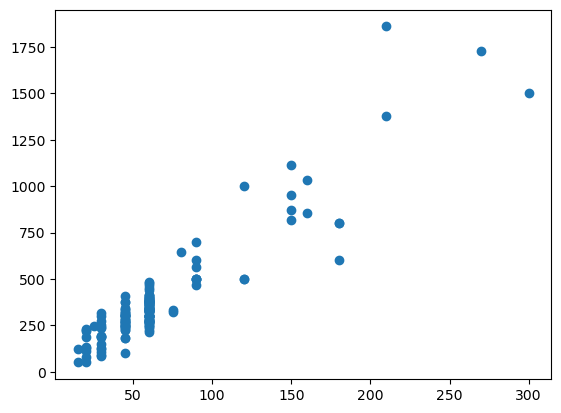

In [50]:
X = df[['Duration']]
y = df['Calories']

plt.scatter(X, y)
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X, y)


LinearRegression()

In [53]:
lr.score(X, y)

0.8492265363886927

In [54]:
from sklearn.metrics import mean_squared_error

Yhat = lr.predict(X)
Yhat[0:5]

array([353.80459809, 353.80459809, 353.80459809, 268.06057942,
       268.06057942])

In [56]:
mse = mean_squared_error(y, Yhat)
mse

10318.790076054782

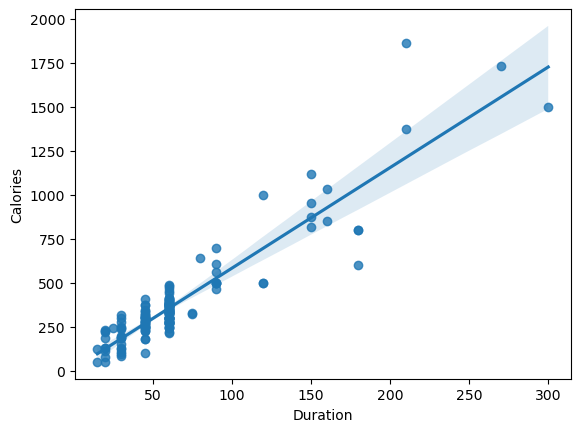

In [52]:
sns.regplot(df, x='Duration', y='Calories')
plt.show()

In [73]:
Z = df.drop('Calories', axis = 1)
Z.head()

lr2 = LinearRegression()

lr2.fit(Z, y)

print(lr2.coef_)
print(lr2.intercept_)
print('The R2 score: ', lr2.score(Z,y))

Yhat2 = lr2.predict(Z)

mse2 = mean_squared_error(y, Yhat2)
print('Mean squared error: ', mse2)

[5.74913631 0.7908014  2.54027721]
-416.768129066869
The R2 score:  0.8874324119634606
Mean squared error:  7704.016890607233


C:\Users\James\AppData\Local\Temp\ipykernel_13144\2914677275.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['Calories'], hist=False, color='r', label='Actual Value')
C:\Users\James\AppData\Local\Temp\ipykernel_13144\2914677275.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<Axes: xlabel='Calories', ylabel='Density'>

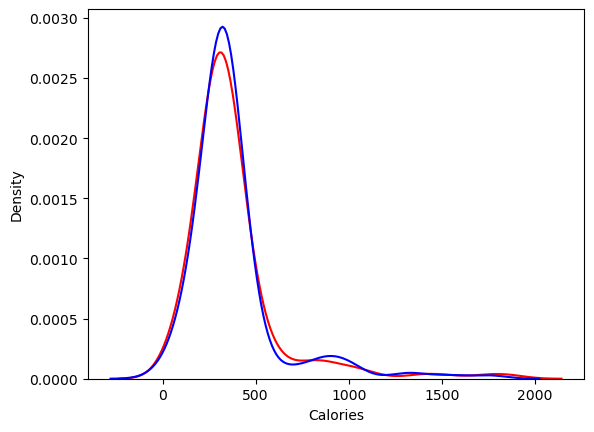

In [67]:
ax1 = sns.distplot(df['Calories'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat2, hist=False, color='b', label='Predicted Values', ax=ax1)

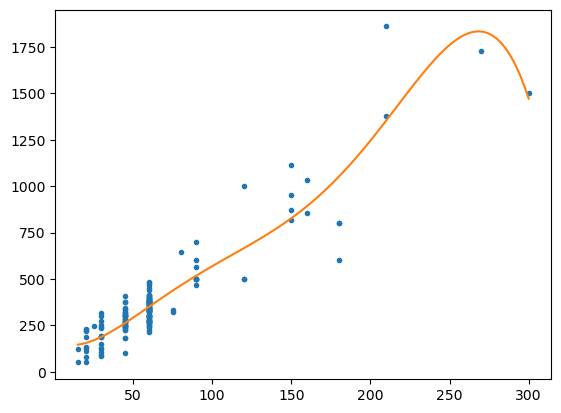

The r2_score is:  0.8675038666419583 and the MSE is:  9067.90726473739


In [107]:
from sklearn.metrics import r2_score

x = df['Duration']

poly = np.polyfit(x, y, 5)
poly_model = np.poly1d(poly)

poly_line = np.linspace(min(x), max(x), 100)

plt.plot(x, y, '.', poly_line, poly_model(poly_line), '-')
plt.show()
plt.close()

polyscore = r2_score(y, poly_model(x))
mse_poly = mean_squared_error(y, poly_model(x))
print('The r2_score is: ', polyscore, 'and the MSE is: ', mse_poly)

